# Statistical Analysis
## <span style="font-weight: normal;">Through the specified statistical analysis field, obtain the p_value of each feature.</span>

In [1]:
import pandas as pd
import numpy as np
from onekey_algo import OnekeyDS as okds
from onekey_algo import get_param_in_cwd
from onekey_algo.custom.utils import print_join_info

task = get_param_in_cwd('task_column') or 'label'
p_value = get_param_in_cwd('p_value') or 0.05
# Replace with a file of one's own clinical data.
test_data = pd.read_csv(get_param_in_cwd('clinic_file') or okds.survival)
stats_columns_settings = get_param_in_cwd('stats_columns')
continuous_columns_settings = get_param_in_cwd('continuous_columns')
mapping_columns_settings = get_param_in_cwd('mapping_columns')
test_data = test_data[[c for c in test_data.columns if c != task]]
test_data['ID'] = test_data['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
group_info = pd.read_csv('group.csv')
print_join_info(test_data, group_info)
test_data = pd.merge(test_data, group_info, on='ID', how='inner')
test_data

[2025-01-06 23:12:34 - <frozen onekey_algo.custom.utils>:  55]	INFO	ID特征完全匹配！


,ID,Sex,Age,Diameter,PE_ratio,StdDev_Lesion,One_min_ratio,Two_min_ratio,Five_min_ratio,Ten_min_ratio,...,CD3,Lymphocyte,Number_of_lesion,Enhanced_pattern,Fianl LR,LR_M,Necrosis,Child-Pugh grade,label,group
0,ZS20276018.nii.gz,1,62,46,1.215,35.291,0.722,0.879,0.597,0.276,...,61.00,NaN,0.0,2,6,1,0,0,1,val
1,ZS21230898.nii.gz,1,71,72,1.446,17.320,1.061,1.094,0.632,0.557,...,63.20,32.00,0.0,1,5,0,1,0,0,val
2,ZS222514934.nii.gz,1,48,29,1.346,33.179,0.846,0.549,0.554,0.404,...,86.64,29.85,1.0,2,5,0,1,0,1,val
3,ZS21236473.nii.gz,1,54,42,1.469,23.901,1.163,0.877,0.778,0.516,...,78.63,39.16,0.0,2,5,0,0,0,1,val
4,XM24004594.nii.gz,1,41,61,2.477,31.294,0.633,0.498,0.267,0.261,...,NaN,NaN,0.0,2,6,1,0,0,0,val
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,XM23071773L.nii.gz,1,61,36,1.066,33.251,0.671,0.400,0.430,0.441,...,NaN,NaN,1.0,1,4,0,0,0,0,val
470,XM23071773S.nii.gz,1,61,16,1.847,30.016,1.013,0.294,0.374,0.512,...,NaN,NaN,1.0,1,4,0,0,0,0,val
471,XM23052952.nii.gz,1,86,52,1.838,31.836,1.318,1.017,0.755,0.574,...,NaN,NaN,0.0,1,5,0,0,0,0,val
472,XM23042205.nii.gz,0,68,75,1.292,31.885,1.056,0.840,0.626,0.443,...,NaN,NaN,0.0,2,5,0,1,0,0,val


# Feature Name Processing
## <span style="font-weight: normal;">Remove all special characters from the feature names.</span>

In [2]:
import re

def map_cnames(x):
    x = re.split('[（|(]', x)[0]
    x = x.replace('-', '_').replace(' ', '_').replace('>', '').replace('/', '_')
    return x.strip()

test_data.columns = list(map(map_cnames, test_data.columns))
test_data.columns

Index(['ID', 'Sex', 'Age', 'Diameter', 'PE_ratio', 'StdDev_Lesion',
       'One_min_ratio', 'Two_min_ratio', 'Five_min_ratio', 'Ten_min_ratio',
       'Cirrhosis', 'Steatosis', 'History_of_HCC', 'HBsAg', 'HBV_DNA', 'AFP',
       'AFP_L3', 'PIVKA_II', 'Treg', 'CD3_CD4', 'CD3', 'Lymphocyte',
       'Number_of_lesion', 'Enhanced_pattern', 'Fianl_LR', 'LR_M', 'Necrosis',
       'Child_Pugh_grade', 'label', 'group'],
      dtype='object')

# Data analysis

In [3]:
stats_columns = stats_columns_settings or list(test_data.columns[1:-2])
test_data = test_data.copy()[['ID'] + stats_columns + ['group', 'label']]
test_data

,ID,Sex,Age,Diameter,PE_ratio,StdDev_Lesion,One_min_ratio,Two_min_ratio,Five_min_ratio,Ten_min_ratio,...,CD3,Lymphocyte,Number_of_lesion,Enhanced_pattern,Fianl_LR,LR_M,Necrosis,Child_Pugh_grade,group,label
0,ZS20276018.nii.gz,1,62,46,1.215,35.291,0.722,0.879,0.597,0.276,...,61.00,NaN,0.0,2,6,1,0,0,val,1
1,ZS21230898.nii.gz,1,71,72,1.446,17.320,1.061,1.094,0.632,0.557,...,63.20,32.00,0.0,1,5,0,1,0,val,0
2,ZS222514934.nii.gz,1,48,29,1.346,33.179,0.846,0.549,0.554,0.404,...,86.64,29.85,1.0,2,5,0,1,0,val,1
3,ZS21236473.nii.gz,1,54,42,1.469,23.901,1.163,0.877,0.778,0.516,...,78.63,39.16,0.0,2,5,0,0,0,val,1
4,XM24004594.nii.gz,1,41,61,2.477,31.294,0.633,0.498,0.267,0.261,...,NaN,NaN,0.0,2,6,1,0,0,val,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,XM23071773L.nii.gz,1,61,36,1.066,33.251,0.671,0.400,0.430,0.441,...,NaN,NaN,1.0,1,4,0,0,0,val,0
470,XM23071773S.nii.gz,1,61,16,1.847,30.016,1.013,0.294,0.374,0.512,...,NaN,NaN,1.0,1,4,0,0,0,val,0
471,XM23052952.nii.gz,1,86,52,1.838,31.836,1.318,1.017,0.755,0.574,...,NaN,NaN,0.0,1,5,0,0,0,val,0
472,XM23042205.nii.gz,0,68,75,1.292,31.885,1.056,0.840,0.626,0.443,...,NaN,NaN,0.0,2,5,0,1,0,val,0


In [4]:
mapping_columns = mapping_columns_settings or [c for c in test_data.columns[1:-2] if test_data[c].dtype == object]
mapping_columns

[]

In [5]:
from onekey_algo.custom.utils import map2numerical

data, mapping = map2numerical(test_data, mapping_columns=mapping_columns)
mapping

{}

In [6]:
continuous_columns = []
for c in stats_columns:
    if len(np.unique(test_data[c])) > 5 or not np.int8 <= test_data[c].dtype <= np.int64:
        continuous_columns.append(c)
        
continuous_columns = continuous_columns_settings or continuous_columns
continuous_columns

['Age',
 'Diameter',
 'PE_ratio',
 'StdDev_Lesion',
 'One_min_ratio',
 'Two_min_ratio',
 'Five_min_ratio',
 'Ten_min_ratio',
 'HBV_DNA',
 'AFP_L3',
 'Treg',
 'CD3_CD4',
 'CD3',
 'Lymphocyte',
 'Number_of_lesion']

# Missing value imputation

In [7]:
import os
from onekey_algo.custom.components.comp1 import fillna
os.makedirs('data', exist_ok=True)
data.to_csv('data/clinical.csv', index=False)
data = fillna(data)
data

,ID,Sex,Age,Diameter,PE_ratio,StdDev_Lesion,One_min_ratio,Two_min_ratio,Five_min_ratio,Ten_min_ratio,...,CD3,Lymphocyte,Number_of_lesion,Enhanced_pattern,Fianl_LR,LR_M,Necrosis,Child_Pugh_grade,group,label
0,ZS20276018.nii.gz,1,62,46,1.215,35.291,0.722,0.879,0.597,0.276,...,61.00,30.294,0.0,2,6,1,0,0,val,1
1,ZS21230898.nii.gz,1,71,72,1.446,17.320,1.061,1.094,0.632,0.557,...,63.20,32.000,0.0,1,5,0,1,0,val,0
2,ZS222514934.nii.gz,1,48,29,1.346,33.179,0.846,0.549,0.554,0.404,...,86.64,29.850,1.0,2,5,0,1,0,val,1
3,ZS21236473.nii.gz,1,54,42,1.469,23.901,1.163,0.877,0.778,0.516,...,78.63,39.160,0.0,2,5,0,0,0,val,1
4,XM24004594.nii.gz,1,41,61,2.477,31.294,0.633,0.498,0.267,0.261,...,72.99,30.294,0.0,2,6,1,0,0,val,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,XM23071773L.nii.gz,1,61,36,1.066,33.251,0.671,0.400,0.430,0.441,...,72.99,30.294,1.0,1,4,0,0,0,val,0
470,XM23071773S.nii.gz,1,61,16,1.847,30.016,1.013,0.294,0.374,0.512,...,72.99,30.294,1.0,1,4,0,0,0,val,0
471,XM23052952.nii.gz,1,86,52,1.838,31.836,1.318,1.017,0.755,0.574,...,72.99,30.294,0.0,1,5,0,0,0,val,0
472,XM23042205.nii.gz,0,68,75,1.292,31.885,1.056,0.840,0.626,0.443,...,72.99,30.294,0.0,2,5,0,1,0,val,0


### Statistical analysis

In [8]:
from onekey_algo.custom.components.stats import clinic_stats

pd.set_option('display.max_rows', None)
stats = clinic_stats(data, 
                     stats_columns= stats_columns,
                     label_column=task, 
                     group_column='group', 
                     continuous_columns= continuous_columns, 
                     pretty=True, verbose=False)
stats.to_csv('stats.csv', index=False, encoding='utf_8_sig')
stats

,feature_name,train-label=ALL,train-label=0,train-label=1,pvalue,val-label=ALL,val-label=0,val-label=1,pvalue
0,Age,60.01±11.03,60.05±11.23,59.93±10.63,0.944,59.60±12.10,59.84±11.37,59.02±13.77,0.69
1,Diameter,44.98±28.87,39.88±26.05,55.96±31.61,<0.001,41.45±30.15,35.37±21.05,55.80±41.73,<0.001
2,PE_ratio,1.67±0.58,1.73±0.62,1.57±0.45,0.019,1.67±0.96,1.64±0.76,1.74±1.33,0.592
3,StdDev_Lesion,29.83±5.64,28.30±4.58,33.13±6.29,<0.001,25.73±9.37,22.22±7.78,34.00±7.42,<0.001
4,One_min_ratio,0.97±0.28,0.98±0.28,0.97±0.27,0.693,1.10±0.96,1.16±1.12,0.98±0.36,0.037
5,Two_min_ratio,0.76±0.26,0.76±0.25,0.75±0.27,0.63,0.84±0.33,0.86±0.35,0.79±0.25,0.087
6,Five_min_ratio,0.57±0.23,0.58±0.23,0.53±0.23,0.125,0.63±0.19,0.65±0.19,0.56±0.17,0.005
7,Ten_min_ratio,0.42±0.23,0.46±0.23,0.33±0.19,<0.001,0.58±0.29,0.63±0.31,0.45±0.19,<0.001
8,HBV_DNA,0.36±0.48,0.33±0.47,0.41±0.49,0.163,0.32±0.47,0.31±0.46,0.37±0.48,0.388
9,AFP_L3,20.02±26.34,18.15±25.68,24.05±27.41,0.02,22.87±54.61,18.81±59.37,32.44±40.18,<0.001


In [9]:
sel_idx = [True if (isinstance(pv[0], str) and pv[0] != '') or (isinstance(pv[0], float) and pv[0] < p_value) else False 
           for pv in np.array(stats['pvalue'])]
sel_data = data[['ID'] + list(stats[sel_idx]['feature_name']) + ['group', 'label']]
sel_data.to_csv('clinic_sel.csv', index=False)
sel_data

,ID,Diameter,PE_ratio,StdDev_Lesion,Ten_min_ratio,AFP_L3,Lymphocyte,AFP,PIVKA_II,Enhanced_pattern,Necrosis,group,label
0,ZS20276018.nii.gz,46,1.215,35.291,0.276,61.000,30.294,1,0,2,0,val,1
1,ZS21230898.nii.gz,72,1.446,17.320,0.557,7.700,32.000,1,1,1,1,val,0
2,ZS222514934.nii.gz,29,1.346,33.179,0.404,83.000,29.850,1,1,2,1,val,1
3,ZS21236473.nii.gz,42,1.469,23.901,0.516,2.200,39.160,1,1,2,0,val,1
4,XM24004594.nii.gz,61,2.477,31.294,0.261,191.000,30.294,1,1,2,0,val,0
5,ZS21258020.nii.gz,34,1.504,35.075,0.266,31.900,49.800,1,1,2,1,val,1
6,ZS21071918.nii.gz,25,1.199,9.791,0.565,7.300,31.500,1,1,1,0,val,0
7,XM24002968.nii.gz,19,2.779,28.888,0.591,21.029,30.294,1,0,1,0,val,0
8,ZS21022487.nii.gz,219,1.065,32.986,0.352,93.300,30.294,1,1,2,1,val,1
9,ZS20047861.nii.gz,26,1.433,13.957,0.588,1.300,27.900,0,0,1,0,val,0


# Univariate analysis, stepwise multivariate analysis


```python
def uni_multi_variable_analysis(data: pd.DataFrame, features: Union[str, List[str]] = None, label_column: str = 'label',
                                alpha=0.1,
                                p_value4multi: float = 0.05, save_dir: Union[str] = None, prefix: str = '',
                                **kwargs):
    """
   

    """
 ```

,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
Sex,-0.738,-0.966,-0.510,0.478,0.381,0.600,0.000
Age,-0.012,-0.016,-0.009,0.988,0.984,0.991,0.000
Diameter,-0.007,-0.011,-0.003,0.993,0.989,0.997,0.002
PE_ratio,-0.475,-0.595,-0.354,0.622,0.552,0.702,0.000
StdDev_Lesion,-0.020,-0.026,-0.013,0.980,0.974,0.987,0.000
One_min_ratio,-0.746,-0.949,-0.544,0.474,0.387,0.580,0.000
Two_min_ratio,-0.930,-1.189,-0.671,0.394,0.305,0.511,0.000
Five_min_ratio,-1.315,-1.659,-0.971,0.268,0.190,0.379,0.000
Ten_min_ratio,-2.168,-2.658,-1.679,0.114,0.070,0.187,0.000


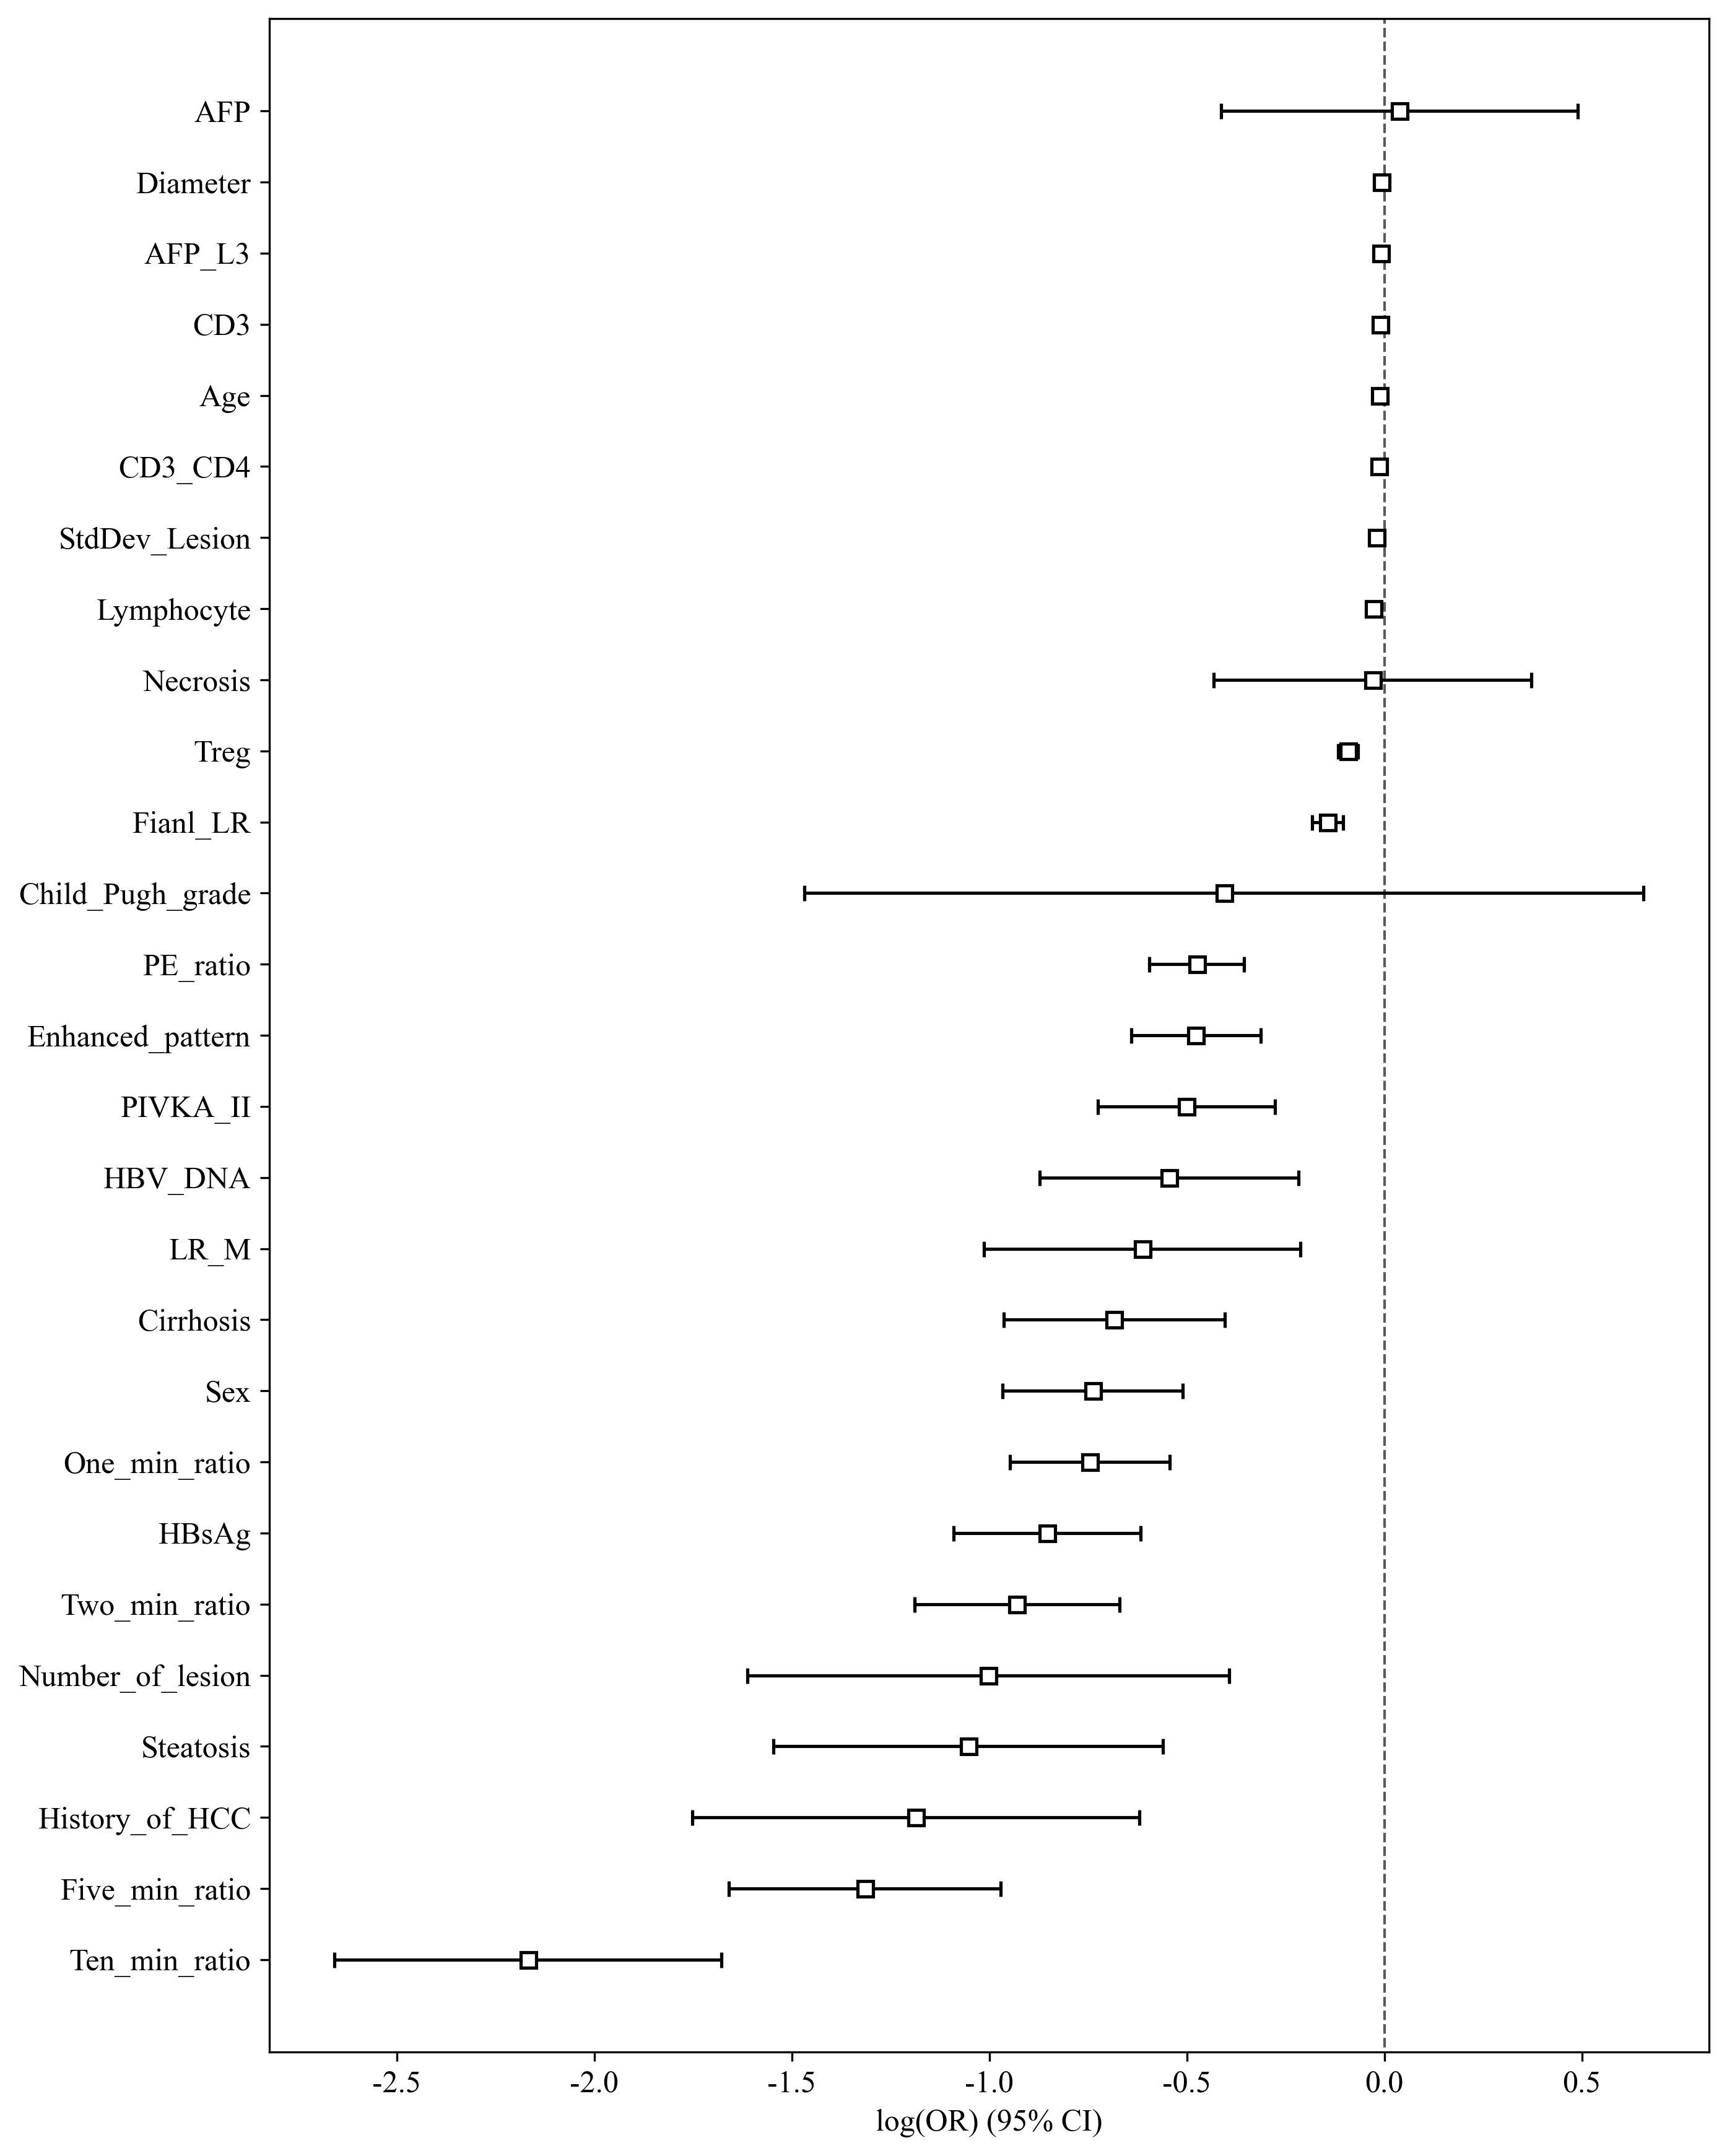

Optimization terminated successfully.
         Current function value: 0.473745
         Iterations 7


,Log(OR),lower 95%CI,upper 95%CI,OR,OR lower 95%CI,OR upper 95%CI,p_value
feature_name,,,,,,,
Ten_min_ratio,-3.725,-5.428,-2.022,0.024,0.004,0.132,0.000
Five_min_ratio,1.791,0.078,3.504,5.995,1.081,33.248,0.086
History_of_HCC,-0.166,-0.960,0.627,0.847,0.383,1.872,0.731
Steatosis,-0.318,-0.953,0.317,0.727,0.386,1.373,0.410
Number_of_lesion,-0.113,-0.913,0.687,0.893,0.401,1.988,0.816
Two_min_ratio,1.392,0.124,2.659,4.021,1.132,14.282,0.071
HBsAg,-0.534,-1.203,0.135,0.586,0.300,1.145,0.190
One_min_ratio,-0.710,-2.092,0.671,0.491,0.123,1.956,0.398
Sex,-0.034,-0.649,0.581,0.967,0.523,1.788,0.928


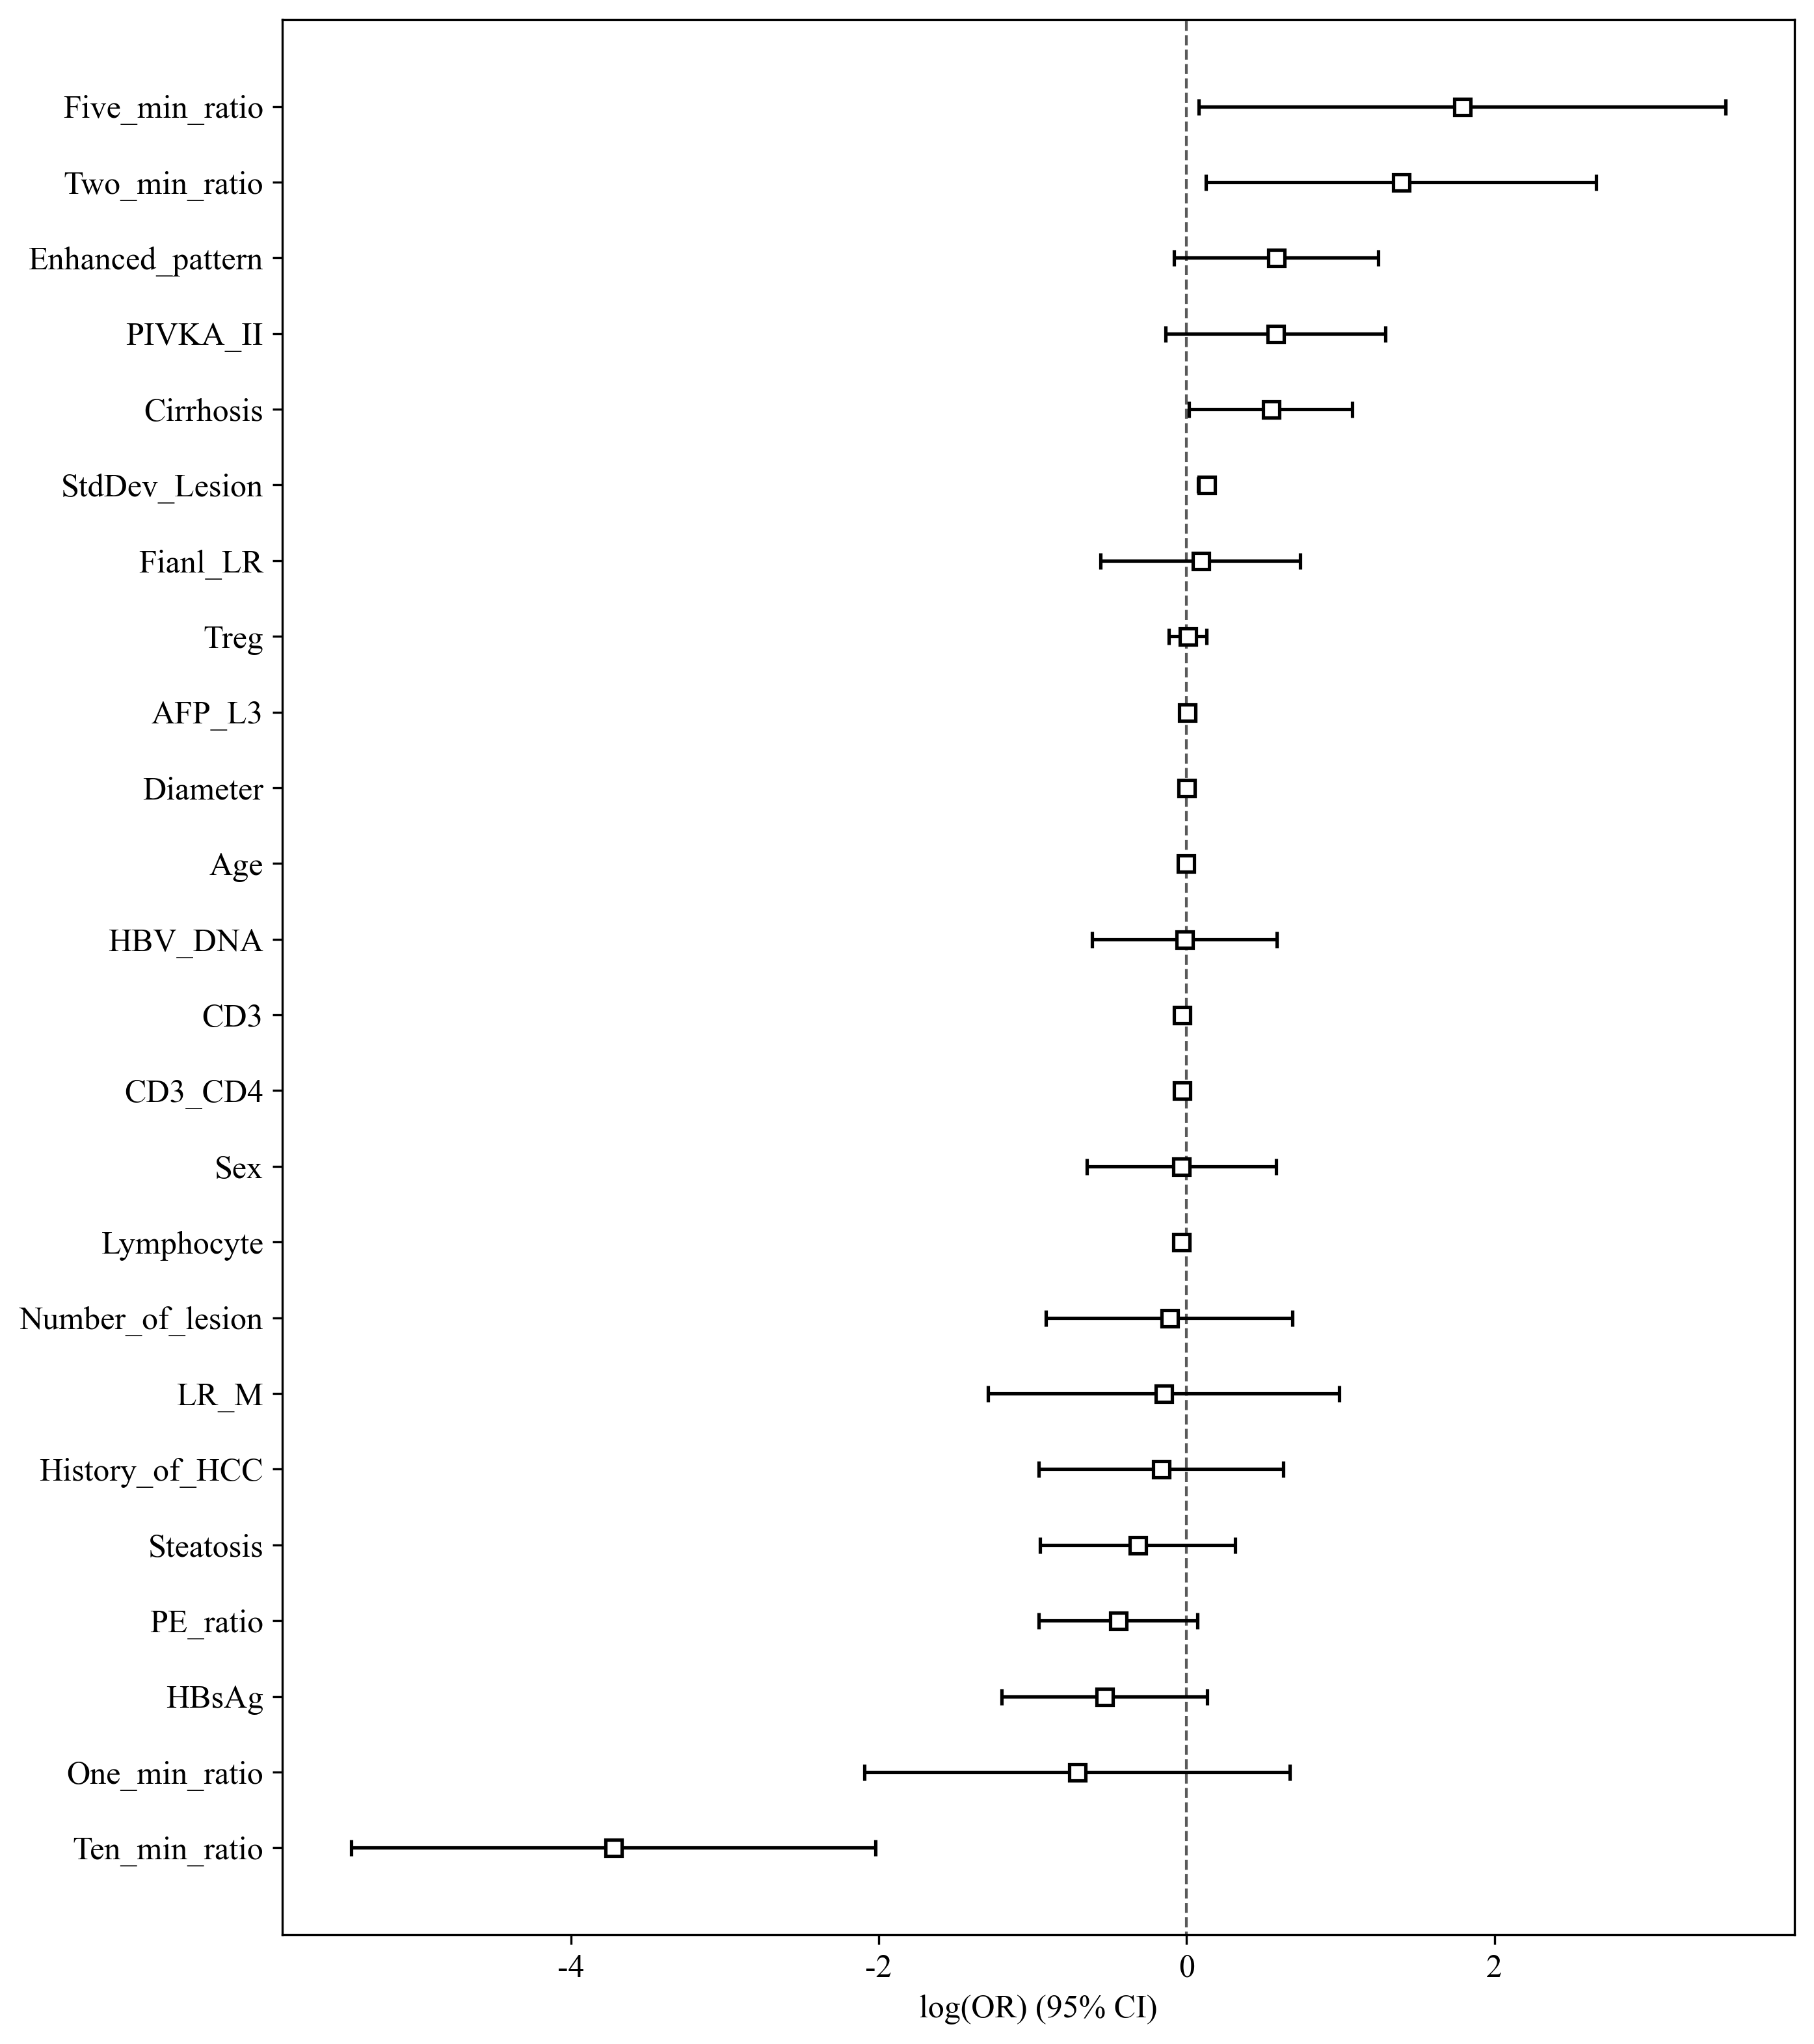

In [10]:
from onekey_algo.custom.components.comp1 import uni_multi_variable_analysis                        

uni_multi_variable_analysis(data[data['group'] == 'train'], stats_columns, save_dir='img', p_value4multi=p_value, algo='logit')

#from onekey_algo.custom.components.comp1 import uni_multi_variable_analysis                        

#uni_multi_variable_analysis(data[data['group'] == 'train'], stats_columns, save_dir='img', p_value4multi=1, algo='logit')